In [1]:
#https://github.com/OmarMedhat22/Sound-Classification-Mel-Spectrogram/blob/master/mel%20spectrogram.ipynb
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa   
import librosa.display
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import keras
from sklearn.metrics import classification_report

%matplotlib inline


1.20.0


# DATA PREPROCESSING AND FEATURE CREATION

In [2]:
audio_data = []
labels = []
sampling_rate = []
file_names = []

In [3]:
filename = './audioset-processing/output/screaming/-2yygHLdpXc_20.wav'
#samplerate, data = wavfile.read("dataset/dog/1-30344-A.wav")
data, samplerate = librosa.load(filename, sr=44000) # Downsample 44.1kHz to 8kHz

print(data.shape)
print(samplerate)

(440000,)
44000


In [4]:
time_sec = (len(data)/samplerate)
step = time_sec/len(data)
print(time_sec)
print(step)
i=0
time_divion=[]
while i<=time_sec-step:
    
    time_divion.append(i)
    i=i+step
# the fourth second step
four_sec_step_number = (4*len(time_divion))/time_sec
print(four_sec_step_number)

10.0
2.2727272727272726e-05
176000.0


In [5]:
classes = ['screaming'
           #, 'whispering'
           #, 'music'
           #, 'water'
           #, 'wind'
           #, 'vehicle'
           #, 'tools'
           , 'Subway, metro, underground'
           #, 'alarm'
           #, 'silence'
           #, 'animal'
           , 'speech'
           #, 'television'
           , 'Outside, rural or natural'
           , 'Traffic noise, roadway noise'
           , 'Inside, small room'
           #, 'radio'
           , 'Outside, urban or manmade'
           , 'singing'
           #, 'Inside, large room or hall'
          ]
label_number=0
audio_data = []
labels = []
sampling_rate = []
file_names = []
data = []
noisy_removed=[]
noise=[]

print(classes)

for i in classes:
    print("the class = "+i+", the label = "+str(label_number))
    for j in glob.iglob('./audioset-processing/output/'+i+'/*'):
        #samplerate, data = wavfile.read(j)
        print(j)
        y, s = librosa.load(j, sr=44000) # Downsample 44.1kHz to 8kHz
        #reduced_noise = nr.reduce_noise(audio_clip=y, noise_clip=y, verbose=False)
        #print(s)
        #print(j)
        data.append([y,label_number])
        #noise.append(y)
        #labels.append(label_number)

    label_number = label_number + 1
print(len(labels))
#print(labels)

['screaming', 'Subway, metro, underground', 'speech', 'Outside, rural or natural', 'Traffic noise, roadway noise', 'Inside, small room', 'Outside, urban or manmade', 'singing']
the class = screaming, the label = 0
./audioset-processing/output/screaming/-MuIRudOtxw_30.wav
./audioset-processing/output/screaming/0zTBKgGKflw_80.wav
./audioset-processing/output/screaming/-Ic7AXv4hH0_0.wav
./audioset-processing/output/screaming/1hQfWYFjrTE_140.wav
./audioset-processing/output/screaming/-WfQBr42ymw_30.wav
./audioset-processing/output/screaming/1NzgluE_9lo_0.wav
./audioset-processing/output/screaming/32_QEpwmYOo_13.wav
./audioset-processing/output/screaming/0Nw1OyTsaAo_30.wav
./audioset-processing/output/screaming/3UGVBYBbzz8_30.wav
./audioset-processing/output/screaming/-nJoxcmxz5g_30.wav
./audioset-processing/output/screaming/-2yygHLdpXc_20.wav
./audioset-processing/output/screaming/0qC99Z0YeMY_210.wav
./audioset-processing/output/screaming/-pwgypWE-J8_30.wav
./audioset-processing/output/scr

./audioset-processing/output/Subway, metro, underground/2xo-01OGuTs_170.wav
./audioset-processing/output/Subway, metro, underground/-Yep0TGjWmc_140.wav
./audioset-processing/output/Subway, metro, underground/2SVSZlHe7b8_240.wav
./audioset-processing/output/Subway, metro, underground/-TpsJ9aY9zU_30.wav
./audioset-processing/output/Subway, metro, underground/09w2dV1HATQ_30.wav
./audioset-processing/output/Subway, metro, underground/1LaHKRlO0Og_10.wav
./audioset-processing/output/Subway, metro, underground/0M58cCTbO04_20.wav
./audioset-processing/output/Subway, metro, underground/3LC9FNl-6kE_150.wav
./audioset-processing/output/Subway, metro, underground/0AvsOIZO0rs_460.wav
./audioset-processing/output/Subway, metro, underground/34F4cpoYIg8_30.wav
./audioset-processing/output/Subway, metro, underground/-hH8ZYxn7zg_10.wav
./audioset-processing/output/Subway, metro, underground/0-RC1xlMs_Q_30.wav
./audioset-processing/output/Subway, metro, underground/1jioOKOVSBg_20.wav
./audioset-processin

./audioset-processing/output/speech/--3mqI-rLFQ_30.wav
./audioset-processing/output/speech/--6-d5gd2W8_30.wav
./audioset-processing/output/speech/--4AZakCudI_30.wav
./audioset-processing/output/speech/--7UmfOkRbM_30.wav
./audioset-processing/output/speech/--AQYzDx57k_0.wav
./audioset-processing/output/speech/--1Bi_4aXyU_30.wav
./audioset-processing/output/speech/--BslWBgH3k_30.wav
./audioset-processing/output/speech/--6CkUtkLUI_30.wav
./audioset-processing/output/speech/--5kRn6Ch3Y_30.wav
./audioset-processing/output/speech/--B7YBAygZU_0.wav
./audioset-processing/output/speech/--4uJNO9DXM_30.wav
./audioset-processing/output/speech/--5bgJ6Y5wo_2.wav
./audioset-processing/output/speech/--8MVXS8Has_30.wav
./audioset-processing/output/speech/--7T50tAIrg_6.wav
./audioset-processing/output/speech/---qub7uxgs_30.wav
./audioset-processing/output/speech/--0pVlB7mQ8_30.wav
./audioset-processing/output/speech/--67GnHhwjk_30.wav
./audioset-processing/output/speech/--CWkRb3dEU_30.wav
./audioset-pro

./audioset-processing/output/Outside, rural or natural/-9-dpbRkJco_150.wav
./audioset-processing/output/Outside, rural or natural/-1TcdZyNUEE_10.wav
./audioset-processing/output/Outside, rural or natural/-BkDIo8x55c_0.wav
./audioset-processing/output/Outside, rural or natural/-ANpArrButE_20.wav
./audioset-processing/output/Outside, rural or natural/-1oGIzUTXPg_30.wav
./audioset-processing/output/Outside, rural or natural/-4Pi0UFlNRA_30.wav
./audioset-processing/output/Outside, rural or natural/-8YaUpswpl0_14.wav
./audioset-processing/output/Outside, rural or natural/-BtfMa0uVZo_60.wav
./audioset-processing/output/Outside, rural or natural/-5AvqqR_8Vg_40.wav
./audioset-processing/output/Outside, rural or natural/-60hVz_H3Ck_30.wav
the class = Traffic noise, roadway noise, the label = 4
./audioset-processing/output/Traffic noise, roadway noise/2ErbvVnLS3Q_0.wav
./audioset-processing/output/Traffic noise, roadway noise/1FHVSLdJLD4_10.wav
./audioset-processing/output/Traffic noise, roadway

./audioset-processing/output/Traffic noise, roadway noise/3Qu_OixtjSA_50.wav
./audioset-processing/output/Traffic noise, roadway noise/2FvfCMpatjQ_70.wav
./audioset-processing/output/Traffic noise, roadway noise/1VUxlKxlxSQ_30.wav
the class = Inside, small room, the label = 5
./audioset-processing/output/Inside, small room/--3SMQlk4Y8_520.wav
./audioset-processing/output/Inside, small room/-1oiBXgssuE_30.wav
./audioset-processing/output/Inside, small room/-0YX5ahBCq0_120.wav
./audioset-processing/output/Inside, small room/-0RUcq5tkNU_60.wav
./audioset-processing/output/Inside, small room/-25VhKUuMXg_30.wav
./audioset-processing/output/Inside, small room/-4Cs_EnVPG4_90.wav
./audioset-processing/output/Inside, small room/-0UMLbS0cMg_150.wav
./audioset-processing/output/Inside, small room/-2PR6vRqK-k_490.wav
./audioset-processing/output/Inside, small room/-0Jx2nAH0c0_40.wav
./audioset-processing/output/Inside, small room/-0qPtkp0Lvo_30.wav
./audioset-processing/output/Inside, small room/-

./audioset-processing/output/Outside, urban or manmade/-A3K0_gtK4c_10.wav
./audioset-processing/output/Outside, urban or manmade/-3-A7d6s9XE_30.wav
./audioset-processing/output/Outside, urban or manmade/-8FNaYomh_Q_20.wav
./audioset-processing/output/Outside, urban or manmade/-0qVjqx4X-E_30.wav
./audioset-processing/output/Outside, urban or manmade/-6k5_z525jU_460.wav
./audioset-processing/output/Outside, urban or manmade/-2dm0i0Beto_30.wav
./audioset-processing/output/Outside, urban or manmade/-1qu_0fDd_8_250.wav
./audioset-processing/output/Outside, urban or manmade/-C4M1TbZgD8_190.wav
./audioset-processing/output/Outside, urban or manmade/-2mQca5Tcak_70.wav
./audioset-processing/output/Outside, urban or manmade/-09Cw7T9HG4_150.wav
./audioset-processing/output/Outside, urban or manmade/-7gpWrnmD88_30.wav
./audioset-processing/output/Outside, urban or manmade/-7_EnwnWS9U_30.wav
./audioset-processing/output/Outside, urban or manmade/-0x8XA-H8EE_250.wav
./audioset-processing/output/Outs

./audioset-processing/output/singing/-0rXXv6jMQ0_30.wav
./audioset-processing/output/singing/--23nKOwPzs_30.wav
./audioset-processing/output/singing/-1fZ2YdJtV4_140.wav
./audioset-processing/output/singing/-0Id8lIl3Mg_30.wav
./audioset-processing/output/singing/-0MTs-YARBI_30.wav
./audioset-processing/output/singing/-1SxJKnqR4s_20.wav
./audioset-processing/output/singing/--ub0qePOhs_30.wav
./audioset-processing/output/singing/--GhscMUci4_30.wav
./audioset-processing/output/singing/-1UB7J32vqo_30.wav
./audioset-processing/output/singing/--w5w_MKO4U_30.wav
./audioset-processing/output/singing/--KMCJIHwK4_30.wav
./audioset-processing/output/singing/--0bntG9i7E_30.wav
./audioset-processing/output/singing/-16_B0uPU6E_30.wav
./audioset-processing/output/singing/--szkzAaYBA_30.wav
./audioset-processing/output/singing/-1YZ9QHdATU_30.wav
./audioset-processing/output/singing/--3HEtfRe4I_220.wav
./audioset-processing/output/singing/--kaN83YtzM_30.wav
./audioset-processing/output/singing/-0D0nNd42

In [6]:
len(data)

764

In [156]:
import random

random.shuffle(data)
audio_data=[]
labels=[]
for i,j in data:
    audio_data.append(i)
    labels.append(j)

In [157]:
print(labels[1])

4


[0.03406124 0.0405856  0.04067016 ... 0.12104097 0.09090268 0.04439508]


Text(0.5, 1.0, 'signal in real time')

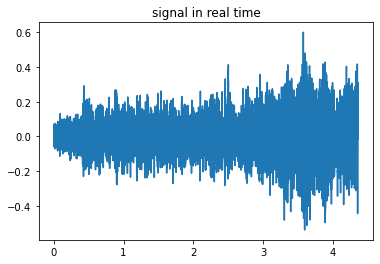

In [158]:
#save_path='dog_time.jpg'
print(audio_data[1])
plt.plot(time_divion[0:192000],audio_data[1][0:192000])
#plt.show()
plt.title('signal in real time')
#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()

In [159]:
example = random.randint(0,len(data))
mel_feat = librosa.feature.melspectrogram(y=audio_data[1],sr=44000)
power = librosa.power_to_db(mel_feat,ref=np.max)
print(power.shape)
print(labels[example])

(128, 860)
3


Text(0.5, 1.0, 'Mel Spectrogram')

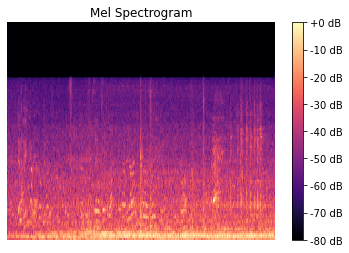

In [160]:
plt.axis('off') # no axis
librosa.display.specshow(power)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

In [161]:
power.shape

(128, 860)

In [162]:
melspectrogram = []
labels_to_delete = []
length_data = len(data)
for i in range (0,len(data)):
    if i%100 == 0:
        print(i)
    mel_feat = librosa.feature.melspectrogram(y=audio_data[i],sr=10000)
    power = librosa.power_to_db(mel_feat)

    power=power.reshape(-1,1)
    #print(power.shape)
    #print(power)
    
    if power.shape[0] > 11776:
        melspectrogram.append(power[:11776])
    #mel_feat=mel_feat.reshape(-1,1)
    #melspectrogram.append(mel_feat[:11776])
    
    if power.shape[0]<11776:
        print(i)
        print(power.shape)
        length_data -= 1
        labels_to_delete.append(i)

print(labels_to_delete)
for i in range(len(labels_to_delete) - 1, -1, -1):
    labels.pop(labels_to_delete[i])
    
melspectrogram =np.array(melspectrogram) 
melspectrogram.shape

0
100
200
300
400
500
600
700
[]


(764, 11776, 1)

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
melspectrogram=melspectrogram.reshape(length_data,-1)
scaler.fit(melspectrogram)
normalized_melspectrogram = scaler.transform(melspectrogram)

print(np.amax(melspectrogram))
print(np.amax(normalized_melspectrogram))
print(melspectrogram.shape)

44.031387
1.0000001
(764, 11776)


In [164]:
features_convolution = np.reshape(normalized_melspectrogram,(length_data,128, -1,1))
#melspectrogram=melspectrogram.reshape(400,128, -1)
features_convolution.shape

(764, 128, 92, 1)

In [165]:
y = to_categorical(labels, num_classes = len(classes), dtype='float32')

# MODEL BUILDING

In [166]:
# TRAIN TEST SPLIT 
X_train, X_test, y_train, y_test = train_test_split(features_convolution, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [167]:
def compile_model(): 
    model = Sequential()

    model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #model.add(Conv2D(64, (3, 3)))
    #model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #model.add(Conv2D(128, (3, 3)))
    #model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dropout(0.2))

    #model.add(Dense(1000))#input_shape=features.shape[1:]
    model.add(Dense(64))#input_shape=features.shape[1:]
    model.add(Dense(len(classes)))

    model.add(Activation('softmax'))
    #sgd = SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [168]:
# WITH VALIDATION_SPLIT
#history = model.fit(features_convolution, y,batch_size=8, epochs=30,validation_split=0.2)

In [171]:
# WITH TRAIN TEST SPLIT 
model = compile_model()
history = model.fit(X_train, y_train, batch_size = 64, epochs = 30, validation_data = (X_test,y_test))

Epoch 1/30
9/9 [==============================] - 2s 178ms/step - loss: 3.3194 - accuracy: 0.1461 - val_loss: 2.4094 - val_accuracy: 0.1130
Epoch 2/30
9/9 [==============================] - 1s 158ms/step - loss: 2.1146 - accuracy: 0.1742 - val_loss: 2.0104 - val_accuracy: 0.2087
Epoch 3/30
9/9 [==============================] - 1s 157ms/step - loss: 1.9123 - accuracy: 0.2622 - val_loss: 1.9405 - val_accuracy: 0.2087
Epoch 4/30
9/9 [==============================] - 1s 160ms/step - loss: 1.8439 - accuracy: 0.2753 - val_loss: 1.9435 - val_accuracy: 0.2261
Epoch 5/30
9/9 [==============================] - 1s 154ms/step - loss: 1.8014 - accuracy: 0.2697 - val_loss: 1.9765 - val_accuracy: 0.2826
Epoch 6/30
9/9 [==============================] - 1s 158ms/step - loss: 1.7301 - accuracy: 0.3333 - val_loss: 1.9442 - val_accuracy: 0.2739
Epoch 7/30
9/9 [==============================] - 1s 156ms/step - loss: 1.6875 - accuracy: 0.3652 - val_loss: 2.0553 - val_accuracy: 0.2435
Epoch 8/30
9/9 [====

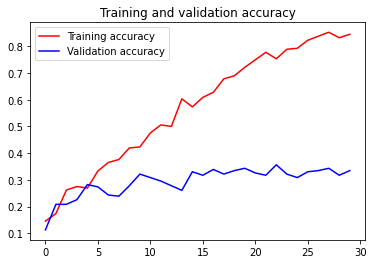

<Figure size 432x288 with 0 Axes>

In [172]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [173]:
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict(X_test)
y_class = y_pred.argmax(axis=-1)
print(y_class.shape)
print(classification_report(Y_test, y_class))
for i in range(len(classes)):
    print(i, ":", classes[i])

(230,)
              precision    recall  f1-score   support

           0       0.27      0.46      0.34        26
           1       0.44      0.70      0.54        33
           2       0.18      0.23      0.21        30
           3       0.60      0.10      0.17        31
           4       0.44      0.50      0.47        24
           5       0.28      0.31      0.29        26
           6       0.24      0.12      0.16        32
           7       0.47      0.29      0.36        28

    accuracy                           0.33       230
   macro avg       0.36      0.34      0.32       230
weighted avg       0.37      0.33      0.31       230

0 : screaming
1 : Subway, metro, underground
2 : speech
3 : Outside, rural or natural
4 : Traffic noise, roadway noise
5 : Inside, small room
6 : Outside, urban or manmade
7 : singing


In [175]:
model.save('my_model_opt.h5')